# **-----------------------**>**EMAIL SPAM FILTERING PROJECT**<**-----------------------**

# Step 1: Import Libraries

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.metrics import accuracy_score

# Download stopwords and punkt if not already downloaded
nltk.download('stopwords')
nltk.download('punkt')

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ENGHK\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ENGHK\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Step 2: Load and Inspect the Dataset


In [60]:
# Load dataset
data_path = r'D:\# DATA SCIENCE\# PROJECTS\- PROJECTS INTERNSHIPS\TECHNOHACKS SOLUTIONS - DATA SCIENCE\Email Spam Filtering Project'
df = pd.read_csv(f'{data_path}/spam.csv', encoding='latin1')

# Display columns and the first few rows
print(df.head())


   Type                                              Email
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


# Step 3: Rename Columns and Basic Data Exploration


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None
       label                 message
count   5572                    5572
unique     2                    5169
top      ham  Sorry, I'll call later
freq    4825                      30
label      0
message    0
dtype: int64
label
ham     4825
spam     747
Name: count, dtype: int64


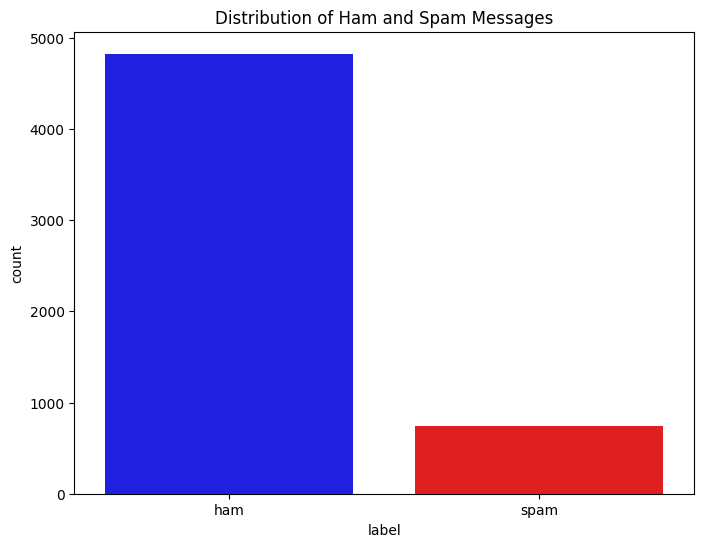

In [61]:
# Rename columns
df = df[['Type', 'Email']]
df.columns = ['label', 'message']

# Basic statistics
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Class distribution
print(df['label'].value_counts())

# Plot class distribution with custom colors
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df, palette={'ham': 'blue', 'spam': 'red'})
plt.title('Distribution of Ham and Spam Messages')
plt.show()


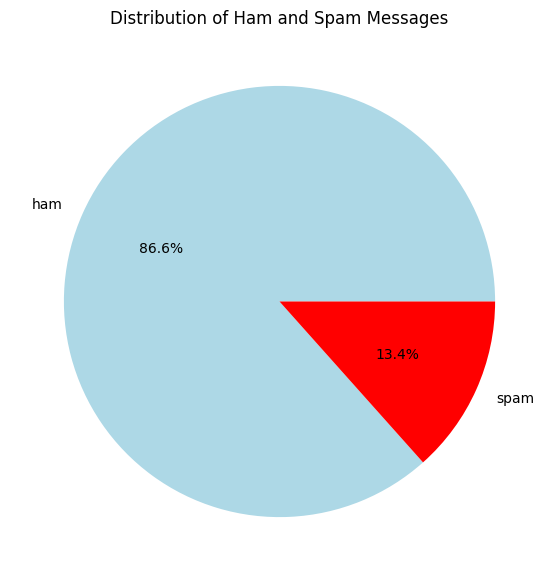

In [62]:

# Count the number of messages for each class
class_counts = df['label'].value_counts()

# Plot pie chart
plt.figure(figsize=(7, 7))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', colors=['lightblue', 'red'])
plt.title('Distribution of Ham and Spam Messages')
plt.show()


# Step 4: Text Preprocessing


In [63]:
# Text preprocessing function
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    # Lowercasing
    tokens = [word.lower() for word in tokens]
    # Removing stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens)

# Apply preprocessing
df['clean_message'] = df['message'].apply(preprocess_text)


# Step 5: Feature Extraction


In [64]:
# Feature extraction using TF-IDF Vectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['clean_message'])
y = df['label'].apply(lambda x: 1 if x == 'spam' else 0)

# Check the shape of the feature matrix
print(f"Feature matrix shape: {X.shape}")


Feature matrix shape: (5572, 7377)


# Step 6: Splitting the Dataset


In [65]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shape of the splits
print(f"Training set shape: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Test set shape: X_test: {X_test.shape}, y_test: {y_test.shape}")


Training set shape: X_train: (3900, 7377), y_train: (3900,)
Test set shape: X_test: (1672, 7377), y_test: (1672,)


# Step 7: Model Training


In [66]:
# Train the Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

# Step 8: Model Evaluation


Confusion Matrix:
[[1452    1]
 [  56  163]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1453
           1       0.99      0.74      0.85       219

    accuracy                           0.97      1672
   macro avg       0.98      0.87      0.92      1672
weighted avg       0.97      0.97      0.96      1672

Accuracy: 96.59%


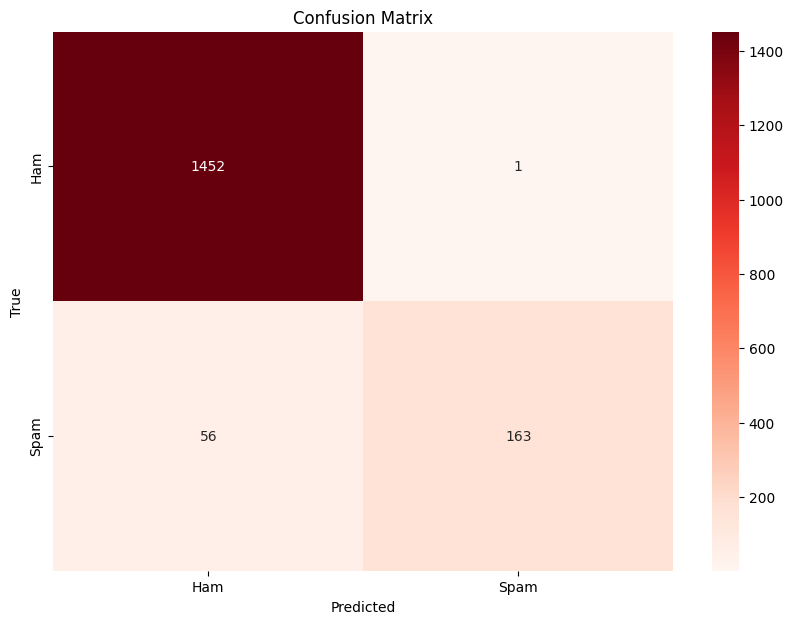

In [67]:
# Import necessary metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 8: Making predictions 
y_pred = model.predict(X_test)

# Evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')  # Print as percentage

# Visualization of the confusion matrix
labels = ['Ham', 'Spam']
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# Step 8: Additional EDA and Visualization


##### Word Cloud of Spam Messages

In [68]:
# pip install wordcloud

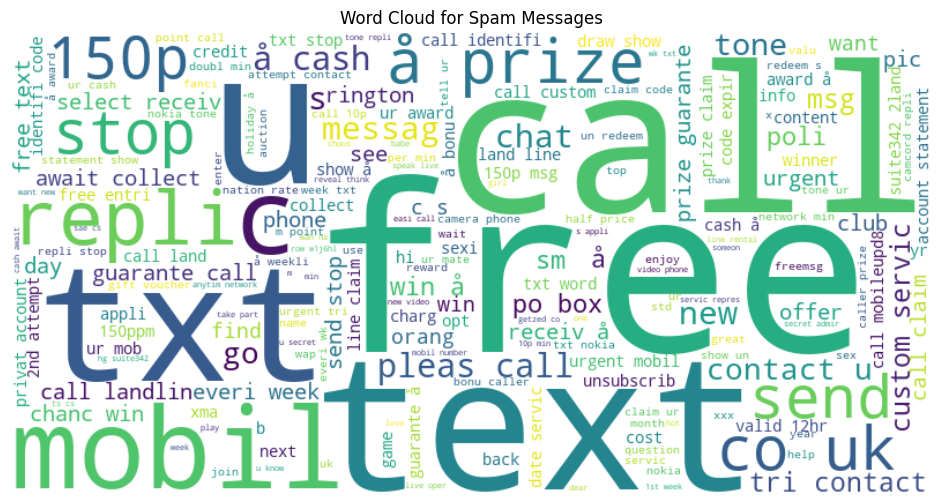

In [69]:
from wordcloud import WordCloud

# Join all spam messages into one string
spam_messages = ' '.join(df[df['label'] == 'spam']['clean_message'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_messages)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Spam Messages')
plt.show()


##### Word Cloud of Ham Messages

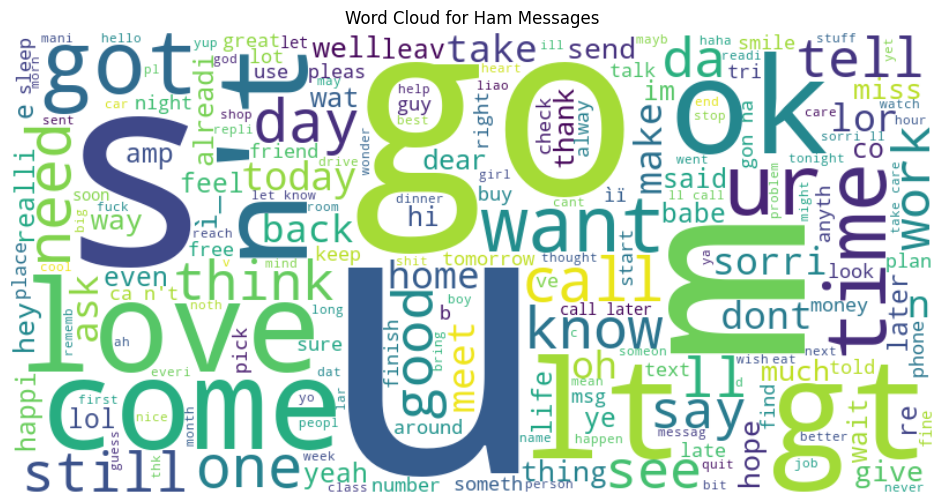

In [70]:
# Join all ham messages into one string
ham_messages = ' '.join(df[df['label'] == 'ham']['clean_message'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_messages)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Ham Messages')
plt.show()
